Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import random
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

Step1: Download necessary NLTK data      



Download necessary NLTK data refers to the process of fetching essential datasets and models (like tokenizers, stopwords, and corpora) used for natural language processing tasks in Python. This is typically done using nltk.download() to enable functions like text tokenization, stemming, and named entity recognition

In [ ]:

nltk.download('stopwords')
nltk.download('wordnet')

warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
raw_df = pd.read_csv("Chatbot data.txt", sep='\t', names=['prompt', 'response'])


  Simulate 50k rows and 10 columns

In [ ]:

np.random.seed(42)
rows = 50000
base_df = pd.DataFrame({
    'prompt': np.random.choice(raw_df['prompt'], rows),
    'response': np.random.choice(raw_df['response'], rows),
    'user_id': np.random.randint(1000, 1100, rows),
    'session_id': np.random.randint(500, 700, rows),
    'emotion': np.random.choice(['happy', 'sad', 'neutral'], rows),
    'topic': np.random.choice(['school', 'weather', 'relationships', 'general'], rows),
    'intent': np.random.choice(['greeting', 'question', 'statement'], rows)
})

base_df['length_prompt'] = base_df['prompt'].apply(len)
base_df['length_response'] = base_df['response'].apply(len)
base_df['contains_question'] = base_df['prompt'].apply(lambda x: '?' in x)


 Step 2: Text Preprocessing using NLP

 Text Preprocessing in NLP refers to the series of steps used to clean and prepare raw text data for analysis or modeling. It includes tasks like tokenization, lowercasing, removing stop words, punctuation, and stemming or lemmatization to improve model performance

In [ ]:

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = text.lower().split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

base_df['clean_prompt'] = base_df['prompt'].apply(clean_text)

 Step 3: Visualizations

[1] Bar Plot

A bar plot is a graphical representation used to display and compare the frequency, count, or other measures (like average) of different categories using rectangular bars.
The length or height of each bar is proportional to the value it represents

<Axes: title={'center': 'Emotion Distribution'}, xlabel='emotion'>

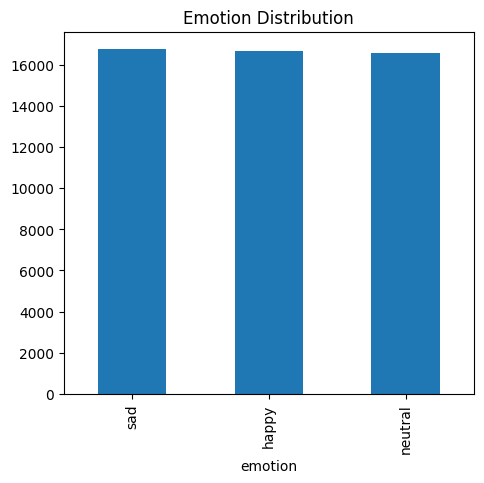

In [ ]:

plt.figure(figsize=(18, 16))

plt.subplot(3, 3, 1)
base_df['emotion'].value_counts().plot(kind='bar', title='Emotion Distribution')


[2]  Pie Chart

A Pie Chart is a circular statistical graphic divided into slices to illustrate numerical proportions.
Each slice represents a category's contribution to the whole, making it useful for visualizing percentage or ratio data

<Axes: title={'center': 'Topic Proportion'}, ylabel='count'>

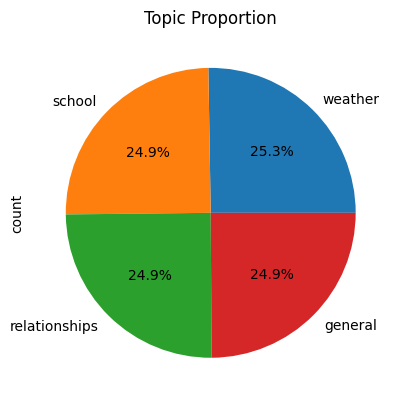

In [ ]:
plt.figure(figsize=(18, 16))
plt.subplot(3, 3, 2)
base_df['topic'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Topic Proportion')

[3]  Histogram

A histogram is a graphical representation that organizes a group of data points into user-specified ranges (bins). It shows the frequency distribution of a dataset, making it easy to visualize patterns such as skewness, spread, and outliers

Text(0.5, 1.0, 'Distribution of Prompt Length')

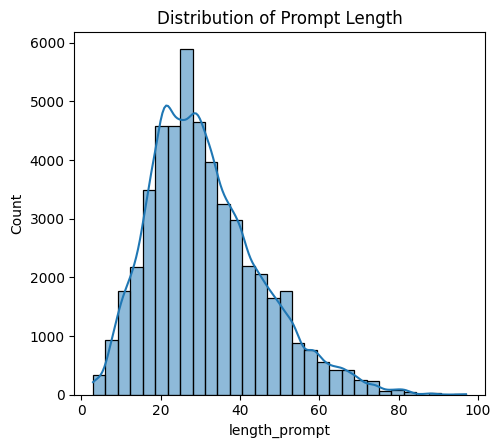

In [ ]:
plt.figure(figsize=(18, 16))
plt.subplot(3, 3, 3)
sns.histplot(base_df['length_prompt'], bins=30, kde=True)
plt.title('Distribution of Prompt Length')

[4] Box Plot

A Box Plot (or box-and-whisker plot) is a statistical visualization that displays the distribution, central value, and variability of a dataset. It shows the minimum, first quartile (Q1), median, third quartile (Q3), and maximum values, helping to identify outliers and skewness

Text(0.5, 1.0, 'Response Length by Emotion')

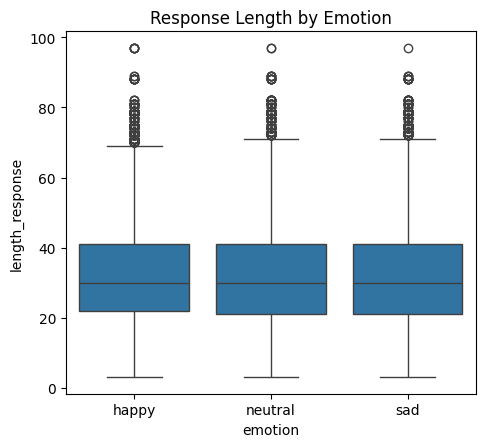

In [ ]:
plt.figure(figsize=(18, 16))
plt.subplot(3, 3, 4)
sns.boxplot(x='emotion', y='length_response', data=base_df)
plt.title('Response Length by Emotion')

[5] Box Plot

Uses of a Box Plot in bullet points:

1.  Visualize data distribution clearly through quartiles and medians.

2.  Identify outliers in a dataset easily.

3.  Compare multiple data sets side by side.

4.  Assess data symmetry or skewness (left/right skew).

5.  Detect variability and data spread across groups.

6.  Summarize large data sets in a compact visual.

7.  Support statistical analysis in exploratory data analysis (EDA).

Text(0.5, 1.0, 'Response Length by Emotion')

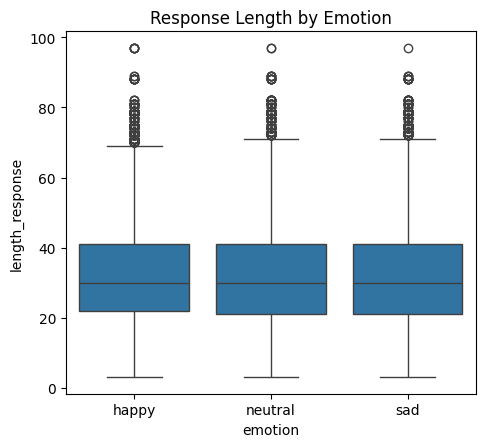

In [ ]:
plt.figure(figsize=(18, 16))
plt.subplot(3, 3, 4)
sns.boxplot(x='emotion', y='length_response', data=base_df)
plt.title('Response Length by Emotion')

[6] HeatMap

A HeatMap is a data visualization technique that uses color gradients to represent the intensity or frequency of values in a matrix or geographic area. It helps quickly identify patterns, trends, and correlations within complex data sets

Text(0.5, 1.0, 'Topic vs Intent')

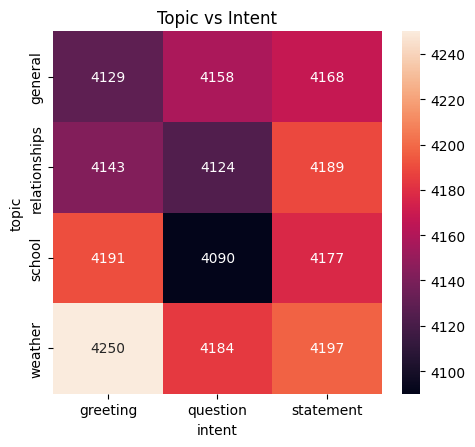

In [ ]:
plt.figure(figsize=(18, 16))
plt.subplot(3, 3, 5)
sns.heatmap(pd.crosstab(base_df['topic'], base_df['intent']), annot=True, fmt='d')
plt.title('Topic vs Intent')


[7] Scatter Plot

A scatter plot is a graphical representation that uses dots to show the relationship between two numerical variables. Each dot represents an observation with its position determined by the values of the two variables

Text(0.5, 1.0, 'Prompt vs Response Length')

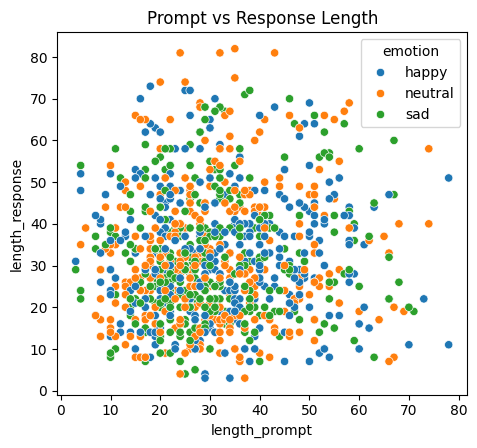

In [ ]:
plt.figure(figsize=(18, 16))
plt.subplot(3, 3, 6)
sns.scatterplot(x='length_prompt', y='length_response', hue='emotion', data=base_df[:1000])
plt.title('Prompt vs Response Length')

[8] Bar Chart

Uses of Bar Chart:

a. Compare quantities across different categories easily

b. Visualize trends or changes over time when categories represent time periods

c. Highlight differences or similarities between groups

d. Display frequency or count data clearly

e. Simplify complex data for quick insights and decision-making

f. Show part-to-whole relationships when using stacked bars

<Axes: title={'center': 'Contains Question in Prompt'}, xlabel='contains_question'>

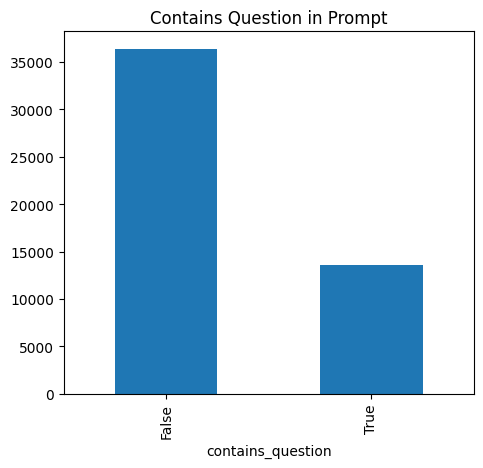

In [ ]:
plt.figure(figsize=(18, 16))
plt.subplot(3, 3, 7)
base_df['contains_question'].value_counts().plot(kind='bar', title='Contains Question in Prompt')


[9] Count Plot


Count Plot Definition:
A Count Plot is a type of bar plot that shows the frequency of each category in a categorical variable by counting the number of occurrences.



Uses of Count Plot:

1. Visualizes the distribution of categorical data.

2. Helps identify the most common categories or class imbalance.

3. Useful for comparing frequencies across multiple categories or groups.

4. Assists in detecting data quality issues like missing or unexpected categories.

Text(0.5, 1.0, 'Intent by Emotion')

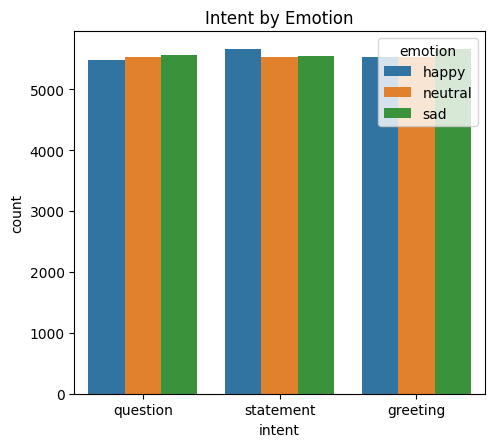

In [ ]:
plt.figure(figsize=(18, 16))
plt.subplot(3, 3, 8)
sns.countplot(x='intent', hue='emotion', data=base_df)
plt.title('Intent by Emotion')


 Step 4: Machine Learning Models with NLP Pipeline


 Machine Learning models with an NLP (Natural Language Processing) pipeline are systems designed to analyze and understand human language using data-driven techniques. The pipeline typically involves stages such as text preprocessing, tokenization, feature extraction, model training, and evaluation. These models learn patterns from large text datasets to perform tasks like sentiment analysis, translation, or question answering. The NLP pipeline ensures raw text is transformed into a format suitable for machine learning algorithms. By combining linguistic rules and statistical methods, these models improve accuracy and efficiency in language understanding. Overall, machine learning with NLP pipelines enables computers to interpret, generate, and respond to natural language in meaningful ways


In [ ]:
X = base_df['clean_prompt']
y = base_df['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

for name, model in models.items():
    print(f"\n--- {name} Report ---")
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    print(classification_report(y_test, preds))



--- Naive Bayes Report ---
              precision    recall  f1-score   support

    greeting       0.33      0.33      0.33      3345
    question       0.34      0.30      0.32      3303
   statement       0.34      0.38      0.36      3352

    accuracy                           0.34     10000
   macro avg       0.34      0.34      0.34     10000
weighted avg       0.34      0.34      0.34     10000


--- Logistic Regression Report ---
              precision    recall  f1-score   support

    greeting       0.34      0.37      0.35      3345
    question       0.34      0.32      0.33      3303
   statement       0.35      0.33      0.34      3352

    accuracy                           0.34     10000
   macro avg       0.34      0.34      0.34     10000
weighted avg       0.34      0.34      0.34     10000


--- Random Forest Report ---
              precision    recall  f1-score   support

    greeting       0.34      0.36      0.35      3345
    question       0.33      0.33  

Result:
Lets Test it by User Inputs

Pick one pipeline to use as chatbot model (e.g., Logistic Regression)

In [17]:
print("\n--- Chatbot Example Interaction ---")
chatbot_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])


--- Chatbot Example Interaction ---


Train chatbot pipeline on full training data

In [18]:
chatbot_pipeline.fit(X_train, y_train)

def chatbot_response(user_input):
    # Clean input text same as training
    cleaned_input = clean_text(user_input)
    # Predict intent
    intent_pred = chatbot_pipeline.predict([cleaned_input])[0]
    # Based on intent, give a canned response (you can customize this dictionary)
    responses = {
        'greeting': "Hello! How can I assist you today?",
        'question': "That's an interesting question. Let me think...",
        'statement': "Thanks for sharing that with me."
    }
    return responses.get(intent_pred, "Sorry, I didn't understand that.")


In [23]:
# Interactive chatbot session
print("\n--- Interactive Chatbot ---")
print("Type 'exit' or 'quit' to end the chat.\n")

while True:
    user_text = input("You: ")
    if user_text.lower() in ['exit', 'quit']:
        print("Chatbot: Goodbye! Have a great day!")
        break
    response = chatbot_response(user_text)
    print(f"Chatbot: {response}\n")



--- Interactive Chatbot ---
Type 'exit' or 'quit' to end the chat.

You: hi
Chatbot: That's an interesting question. Let me think...

You: how are you
Chatbot: Hello! How can I assist you today?

You: how are you
Chatbot: Hello! How can I assist you today?

You: exit
Chatbot: Goodbye! Have a great day!
